# CA2 - Supervised machine learning classification pipeline - applied to medical data

Group 18

Names:
- Jørgen Asmundvaag
- Ivar Eftedal
- Christopher Strand
- Frederic Strand

### Important information

- Do __not__ use scikit-learn (`sklearn`) or any other high-level machine learning library for this CA
- Explain your code and reasoning in markdown cells or code comments
- Label all graphs and charts if applicable
- If you use code from the internet, make sure to reference it and explain it in your own words
- If you use additional function arguments, make sure to explain them in your own words
- Use the classes `Perceptron`, `Adaline` and `Logistic Regression` from the library `mlxtend` as classifiers (`from mlxtend.classifier import Perceptron, Adaline, LogisticRegression`). _Always_ use the argument `minibatches=1` when instantiating an `Adaline` or `LogisticRegression` object. This makes the model use the gradient descent algorithm for training. Always use the `random_seed=42` argument when instantiating the classifiers. This will make your results reproducible.
- You can use any plotting library you want (e.g. `matplotlib`, `seaborn`, `plotly`, etc.)
- Use explanatory variable names (e.g. `X_train` and `X_train_scaled` for the training data before and after scaling, respectively)
- The dataset is provided in the file `fetal_health.csv` in the `assets` folder

### Additional clues

- Use the `pandas` library for initial data inspection and preprocessing
- Before training the classifiers, convert the data to raw `numpy` arrays
- For Part IV, you are aiming to create a plot that looks similar to this:
<img src="./assets/example_output.png" width="300">

### Additional information

- Feel free to create additional code or markdown cells if you think it will help you explain your reasoning or structure your code (you don't have to).


## Part I: Data loading and data exploration

### Import necessary libraries/modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Loading and exploring data

1. Load the dataset `fetal_health.csv` with `pandas`. Use the first column as the row index.
2. Check for missing data, report on your finding and remove samples with missing data, if you find any.
3. Display the raw data with appropriate plots/outputs and inspect it. Describe the distributions of the values of feature `"baseline value"`, `"accelerations"`, and the target variable `"fetal_health"`.
4. Will it be beneficial to scale the data? Why or why not?
5. Is the data linearly separable using a combination of any two pairs of features? Can we expect an accuracy close to 100% from a linear classifier?

No, the data is not linearly seperable and therefore we cannot expect accuracy close to 100% from a linear classifier based on the features `"baseline value"`, `"accelerations"`.

In [3]:
# 1. Load the data
fetal_health_df = pd.read_csv('assets/fetal_health.csv')

# 2. Check for missing values
print(f" Null: {fetal_health_df.isnull().sum()}")
print("-"*50)
# Check for NaN values
print(f"NaN: {fetal_health_df.isna().sum()}")

 Null: Unnamed: 0                                                0
baseline value                                            0
accelerations                                             0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
histogram_mean                                            0
histogram_variance                                        0
fetal_health                                              0
dtype: int64
--------------------------------------------------
NaN: Unnamed: 0                                                0
baseline value                                            0
accelerations                                             0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term

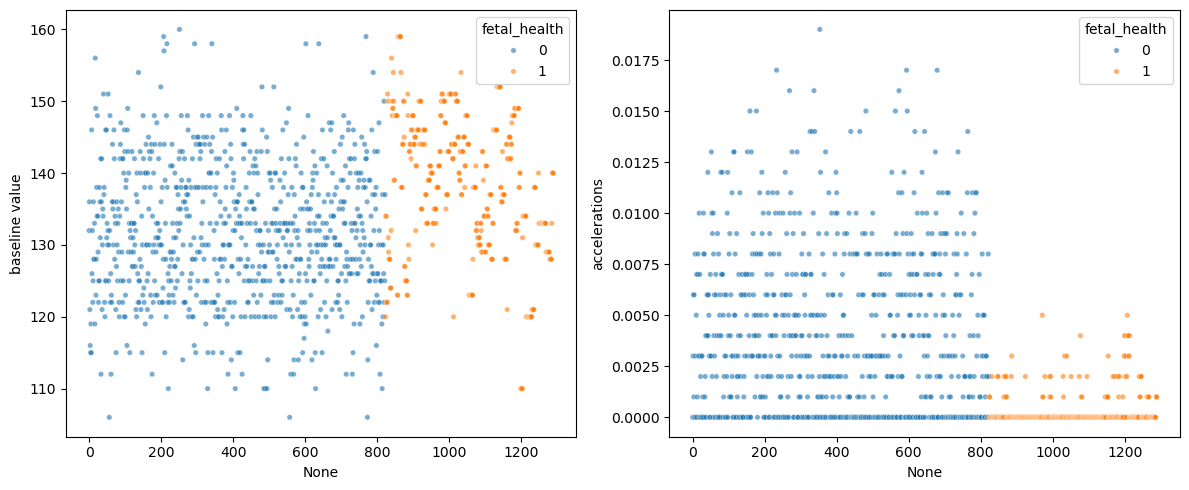

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Baseline value
sns.scatterplot(
    x=fetal_health_df.index, 
    y=fetal_health_df['baseline value'],
    hue=fetal_health_df['fetal_health'],
    alpha=0.6,
    s=15,
    ax=axes[0]
)

# Plot 2: Accelerations
sns.scatterplot(
    x=fetal_health_df.index, 
    y=fetal_health_df['accelerations'],
    hue=fetal_health_df['fetal_health'],
    alpha=0.6,
    s=15,
    ax=axes[1]
)

plt.tight_layout()

#### 4. Should we scale the data?

Yes, scaling the data would be a good idea when training the model since the scales are very different. Having values in the same span 0 to 1 helps the training of the model. On the other hand the data will now be less understandable.

#### 5. Is the data linearly seperable?

Yes, the data seems to be linearly seperable. However, there are mange points around the seperable line, which may cause some issues.

## Part II: Train/Test Split

Divide your dataset into training and testing subsets. Follow these steps to create the split:

1. **Divide the dataset into two data sets, each data set only contains samples of either class 0 or class 1:**
- Create a DataFrame `df_0` containing all data with `"fetal_health"` equal to 0.
- Create a DataFrame `df_1` containing all data with `"fetal_health"` equal to 1.

2. **Split into training and test set by randomly sampling entries from the data frames:**
- Create a DataFrame `df_0_train` containing by sampling `75%` of the entries from `df_0` (use the `sample` method of the data frame, fix the `random_state` to `42`).
- Create a DataFrame `df_1_train` using the same approach with `df_1`.
- Create a DataFrame `df_0_test` containing the remaining entries of `df_0` (use `df_0.drop(df_0_train.index)` to drop all entries except the previously extracted ones).
- Create a DataFrame `df_1_test` using the same approach with `df_1`.

3. **Merge the datasets split by classes back together:**
- Create a DataFrame `df_train` containing all entries from `df_0_train` and `df_1_train`. (Hint: use the `concat` method you know from CA1)
- Create a DataFrame `df_test` containing all entries from the two test sets.

4. **Create the following data frames from these splits:**
- `X_train`: Contains all columns of `df_train` except for the target feature `"fetal_health"`
- `X_test`: Contains all columns of `df_test` except for the target feature `"fetal_health"`
- `y_train`: Contains only the target feature `"fetal_health"` for all samples in the training set
- `y_test`: Contains only the target feature `"fetal_health"` for all samples in the test set

5. **Check that your sets have the expected sizes/shape by printing number of rows and colums ("shape") of the data sets.**
- (Sanity check: there should be 8 features, almost 1000 samples in the training set and slightly more than 300 samples in the test set.)


6. **Explain the purpose of this slightly complicated procedure. Why did we first split into the two classes? Why did we then split into a training and a testing set?**


7. **What is the share (in percent) of samples with class 0 label in test and training set, and in the intial data set?**



In [ ]:
random_state = 42 # For reproducibility

# Drop first column
fetal_health_df = fetal_health_df.drop(fetal_health_df.columns[0], axis=1)

# 1. Split the data into 1 and 0
df_0 = fetal_health_df[fetal_health_df['fetal_health'] == 0]
df_1 = fetal_health_df[fetal_health_df['fetal_health'] == 1]

# 2. Create a training df with 75% of the data random sampled
df_0_train = df_0.sample(frac=0.75, random_state=random_state)
df_1_train = df_1.sample(frac=0.75, random_state=random_state)

# Create a testing df with the remaining 25% of the data
df_0_test = df_0.drop(df_0_train.index)
df_1_test = df_1.drop(df_1_train.index)

# 3. Combine the training and testing data
train_df = pd.concat([df_0_train, df_1_train])
test_df = pd.concat([df_0_test, df_1_test])

# 4. Split the data into X and y
X_train = train_df.drop('fetal_health', axis=1)
y_train = train_df['fetal_health']
X_test = test_df.drop('fetal_health', axis=1)
y_test = test_df['fetal_health']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((967, 8), (967,), (323, 8), (323,))

#### 6. **Explain the purpose of this slightly complicated procedure. Why did we first split into the two classes? Why did we then split into a training and a testing set?**



In [ ]:
print(f"Percent 0 in training data: {y_train.value_counts()[0] / len(y_train) * 100:.2f}%")
print(f"Percent 0 in testing data: {y_test.value_counts()[0] / len(y_test) * 100:.2f}%")
print(f"Percent 0 in original data: {fetal_health_df['fetal_health'].value_counts()[0] / len(fetal_health_df) * 100:.2f}%")

Percent 0 in training data: 63.81%
Percent 0 in testing data: 63.78%
Percent 0 in original data: 63.80%


### Convert data to numpy arrays and shuffle the training data

Many machine learning models (including those you will work with later in the assignment) will not accept DataFrames as input. Instead, they will only work if you pass numpy arrays containing the data.
Here, we convert the DataFrames `X_train`, `X_test`, `y_train`, and `y_test` to numpy arrays `X_train`, `X_test`, `y_train`, and `y_test`.

Moreover we shuffle the training data. This is important because the training data is currently ordered by class. In Part IV, we use the first n samples from the training set to train the classifiers. If we did not shuffle the data, the classifiers would only be trained on samples of class 0.

Nothing to be done here, just execute the cell.

In [ ]:
# convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# shuffle training data
np.random.seed(42) # for reproducibility
shuffle_index = np.random.permutation(len(X_train)) # generate random indices
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # shuffle data by applying reordering with the random indices

## Part III: Scaling the data

1. Standardize the training _and_ test data so that each feature has a mean of 0 and a standard deviation of 1.
2. Check that the scaling was successful
    - by printing the mean and standard deviation of each feature in the scaled training set
    - by putting the scaled training set into a DataFrame and make a violin plot of the data

__Hint:__ use the `axis` argument to calculate mean and standard deviation column-wise.

__Important:__ Avoid data leakage!

__More hints:__

1. For each column, subtract the mean $(\mu)$ of each column from each value in the column
2. Divide the result by the standard deviation $(\sigma)$ of the column

(You saw how to do both operations in the lecture. If you don't remember, you can look it up in Canvas files.)

Mathematically (in case this is useful for you), this transformation can be represented for each column as follows:

$$ X_\text{scaled} = \frac{(X - \mu)}{\sigma} $$

where:
- $(X_\text{scaled})$ are the new, transformed column values (a column-vector)
- $(X)$ is the original values
- $(\mu)$ is the mean of the column
- $(\sigma)$ is the standard deviation of the column



Mean: [-6.94606960e-18 -1.31803106e-16  4.56925087e-15 -2.96097744e-16
  1.33869705e-16 -2.12543989e-17 -2.86453614e-16 -2.93342278e-16
 -7.18717284e-17]
std: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


Text(0.5, 1.0, 'Violin plot of scaled training data')

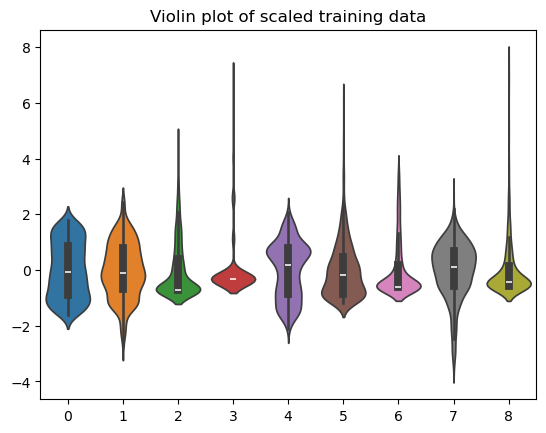

In [ ]:
train_scaled = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
test_scaled = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

print(f"Mean: {train_scaled.mean(axis=0)}")
print(f"std: {train_scaled.std(axis=0)}")

df_train_scaled = pd.DataFrame(train_scaled)

sns.violinplot(data=df_train_scaled).set_title('Violin plot of scaled training data')

## Part IV: Training and evaluation with different dataset sizes and training times

Often, a larger dataset size will yield better model performance. (As we will learn later, this usually prevents overfitting and increases the generalization capability of the trained model.)
However, collecting data is usually rather expensive.

In this part of the exercise, you will investigate

- how the model performance changes with varying dataset size
- how the model performance changes with varying numbers of epochs/iterations of the optimizer/solver (increasing training time).

For this task (Part IV), use the `Adaline`, `Perceptron`, and `LogisticRegression` classifier from the `mlxtend` library. All use the gradient descent (GD) algorithm for training.

__Important__: Use a learning rate of `1e-4` (`0.0001`) for all classifiers, and use the argument `minibatches=1` when initializing `Adaline` and `LogisticRegression` classifier (this will make sure it uses GD). For all three classifiers, pass `random_seed=42` when initializing the classifier to ensure reproducibility of the results.

### Model training

Train the model models using progressively larger subsets of your dataset, specifically: first 50 rows, first 100 rows, first 150 rows, ..., first 650 rows, first 700 rows (in total $14$ different variants).

For each number of rows train the model with progressively larger number of epochs: 2, 7, 12, 17, ..., 87, 92, 97 (in total $20$ different model variants).

The resulting $14 \times 20 = 280$ models obtained from the different combinations of subsets and number of epochs. An output of the training process could look like this:

```
Model (1) Train a model with first 50 rows of data for 2 epochs
Model (2) Train a model with first 50 rows of data for 7 epochs
Model (3) Train a model with first 50 rows of data for 12 epochs
...
Model (21) Train a model with first 100 rows of data for 2 epochs
Model (22) Train a model with first 100 rows of data for 7 epochs
...
Model (279) Train a model with first 700 rows of data for 92 epochs
Model (280) Train a model with first 700 rows of data for 97 epochs
```

### Model evaluation

For each of the $280$ models, calculate the __accuracy on the test set__ (do __not__ use the score method but compute accuracy yourself).
Store the results in the provided 2D numpy array (it has $14$ rows and $20$ columns).
The rows of the array correspond to the different dataset sizes, and the columns correspond to the different numbers of epochs.

### Tasks
1. Train the $280$ Adaline classifiers as mentioned above and calculate the accuracy for each of the $280$ variants.
2. Generalize your code so that is doing the same procedure for all three classifiers: `Perceptron`, `Adaline`, and `LogisticRegression` after each other. Store the result for all classifiers. You can for example use an array of shape $3\times14\times20$ to store the accuracies of the three classifiers.

Note that executing the cells will take some time (but on most systems it should not be more than 5 minutes).

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.classifier import Perceptron, Adaline, LogisticRegression

classifiers = {
    'Perceptron': lambda epochs: Perceptron(eta=1e-4, epochs=epochs, random_seed=42),
    'Adaline': lambda epochs: Adaline(eta=1e-4, epochs=epochs, minibatches=1, random_seed=42),
    'Logistic Regression': lambda epochs: LogisticRegression(eta=1e-4, epochs=epochs, minibatches=1, random_seed=42)
}

sizes = np.arange(50, 701, 50)
epochs_list = np.arange(2, 98, 5)

scores = np.zeros((len(classifiers), len(sizes), len(epochs_list)))

for clf_idx, (clf_name, clf_factory) in enumerate(classifiers.items()):
    for i, size in enumerate(sizes):
        X_sub = train_scaled[:size]
        y_sub = y_train[:size].astype(int)
        for j, n_epochs in enumerate(epochs_list):
            clf = clf_factory(n_epochs)
            clf.fit(X_sub, y_sub)
            preds = clf.predict(test_scaled)
            accuracy = np.mean(preds == y_test)
            scores[clf_idx, i, j] = accuracy
            print(f"{clf_name}: Training with first {size} rows for {n_epochs} epochs -> Test Accuracy: {accuracy:.4f}")


Perceptron: Training with first 50 rows for 2 epochs -> Test Accuracy: 0.8204
Perceptron: Training with first 50 rows for 7 epochs -> Test Accuracy: 0.8359
Perceptron: Training with first 50 rows for 12 epochs -> Test Accuracy: 0.8576
Perceptron: Training with first 50 rows for 17 epochs -> Test Accuracy: 0.8854
Perceptron: Training with first 50 rows for 22 epochs -> Test Accuracy: 0.8793
Perceptron: Training with first 50 rows for 27 epochs -> Test Accuracy: 0.8824
Perceptron: Training with first 50 rows for 32 epochs -> Test Accuracy: 0.8793
Perceptron: Training with first 50 rows for 37 epochs -> Test Accuracy: 0.8824
Perceptron: Training with first 50 rows for 42 epochs -> Test Accuracy: 0.8824
Perceptron: Training with first 50 rows for 47 epochs -> Test Accuracy: 0.8762
Perceptron: Training with first 50 rows for 52 epochs -> Test Accuracy: 0.8731
Perceptron: Training with first 50 rows for 57 epochs -> Test Accuracy: 0.8731
Perceptron: Training with first 50 rows for 62 epochs 

In [ ]:
scores_df = {}
for clf_idx, clf_name in enumerate(classifiers.keys()):
    scores_df[clf_name] = pd.DataFrame(scores[clf_idx, :, :],
                                         index=sizes,
                                         columns=epochs_list)

print("Adaline Accuracy Scores:")
scores_df['Adaline']

Adaline Accuracy Scores:


2         7         12        17        22        27        32  \
50   0.857585  0.869969  0.873065  0.866873  0.866873  0.873065  0.869969   
100  0.879257  0.879257  0.885449  0.882353  0.882353  0.879257  0.879257   
150  0.879257  0.879257  0.882353  0.882353  0.879257  0.879257  0.879257   
200  0.863777  0.863777  0.863777  0.866873  0.873065  0.879257  0.879257   
250  0.860681  0.866873  0.863777  0.869969  0.869969  0.873065  0.876161   
300  0.869969  0.866873  0.866873  0.873065  0.876161  0.882353  0.888545   
350  0.869969  0.866873  0.869969  0.876161  0.885449  0.885449  0.882353   
400  0.879257  0.873065  0.882353  0.885449  0.888545  0.891641  0.894737   
450  0.885449  0.879257  0.888545  0.888545  0.891641  0.900929  0.900929   
500  0.882353  0.882353  0.885449  0.891641  0.891641  0.897833  0.894737   
550  0.888545  0.885449  0.888545  0.894737  0.900929  0.894737  0.894737   
600  0.888545  0.885449  0.888545  0.894737  0.904025  0.897833  0.894737   
650  0.882353  0.879257  0.897833  0.904025  0.900929  0.900929  0.900929   
700  0.882353  0.879257  0.894737  0.907121  0.904025  0.904025  0.904025   

           37        42        47        52        57        62        67  \
50   0.873065  0.873065  0.873065  0.876161  0.873065  0.873065  0.873065   
100  0.879257  0.879257  0.879257  0.879257  0.879257  0.879257  0.882353   
150  0.885449  0.885449  0.882353  0.882353  0.885449  0.885449  0.888545   
200  0.879257  0.876161  0.879257  0.879257  0.882353  0.888545  0.885449   
250  0.876161  0.873065  0.876161  0.882353  0.882353  0.882353  0.882353   
300  0.885449  0.885449  0.885449  0.885449  0.888545  0.894737  0.900929   
350  0.882353  0.891641  0.891641  0.891641  0.891641  0.891641  0.894737   
400  0.900929  0.904025  0.907121  0.907121  0.904025  0.900929  0.900929   
450  0.894737  0.894737  0.894737  0.897833  0.900929  0.900929  0.904025   
500  0.891641  0.891641  0.897833  0.894737  0.894737  0.897833  0.900929   
550  0.897833  0.897833  0.904025  0.907121  0.907121  0.907121  0.907121   
600  0.897833  0.897833  0.900929  0.904025  0.904025  0.904025  0.904025   
650  0.900929  0.900929  0.904025  0.904025  0.904025  0.907121  0.907121   
700  0.907121  0.907121  0.910217  0.910217  0.910217  0.910217  0.907121   

           72        77        82        87        92        97  
50   0.873065  0.873065  0.876161  0.876161  0.876161  0.873065  
100  0.885449  0.885449  0.888545  0.888545  0.897833  0.900929  
150  0.891641  0.897833  0.894737  0.894737  0.897833  0.897833  
200  0.885449  0.882353  0.885449  0.885449  0.885449  0.885449  
250  0.888545  0.891641  0.894737  0.897833  0.900929  0.900929  
300  0.900929  0.897833  0.897833  0.897833  0.897833  0.900929  
350  0.897833  0.897833  0.897833  0.894737  0.894737  0.894737  
400  0.900929  0.900929  0.904025  0.904025  0.907121  0.907121  
450  0.904025  0.904025  0.904025  0.904025  0.904025  0.907121  
500  0.900929  0.907121  0.907121  0.907121  0.907121  0.907121  
550  0.907121  0.907121  0.907121  0.907121  0.907121  0.907121  
600  0.904025  0.904025  0.904025  0.904025  0.904025  0.904025  
650  0.907121  0.907121  0.907121  0.907121  0.907121  0.907121  
700  0.907121  0.907121  0.907121  0.907121  0.907121  0.907121

### Performance visualization

Plot the performance measure for all classifiers (accuracy on the test set; use the result array from above) of all the $280$ variants for each classifier in a total of three heatmaps using, for example `seaborn` or `matplotlib` directly.

The color should represent the accuracy on the test set, and the x and y axes should represent the number of epochs and the dataset size, respectively.
Which one is x and which one is y is up to you to decide. Look in the example output at the top of the assignment for inspiration for how the plot could look like and how it could be labeled nicely. (But use the correct numbers corresponding to your dataset sizes and number of epochs.)

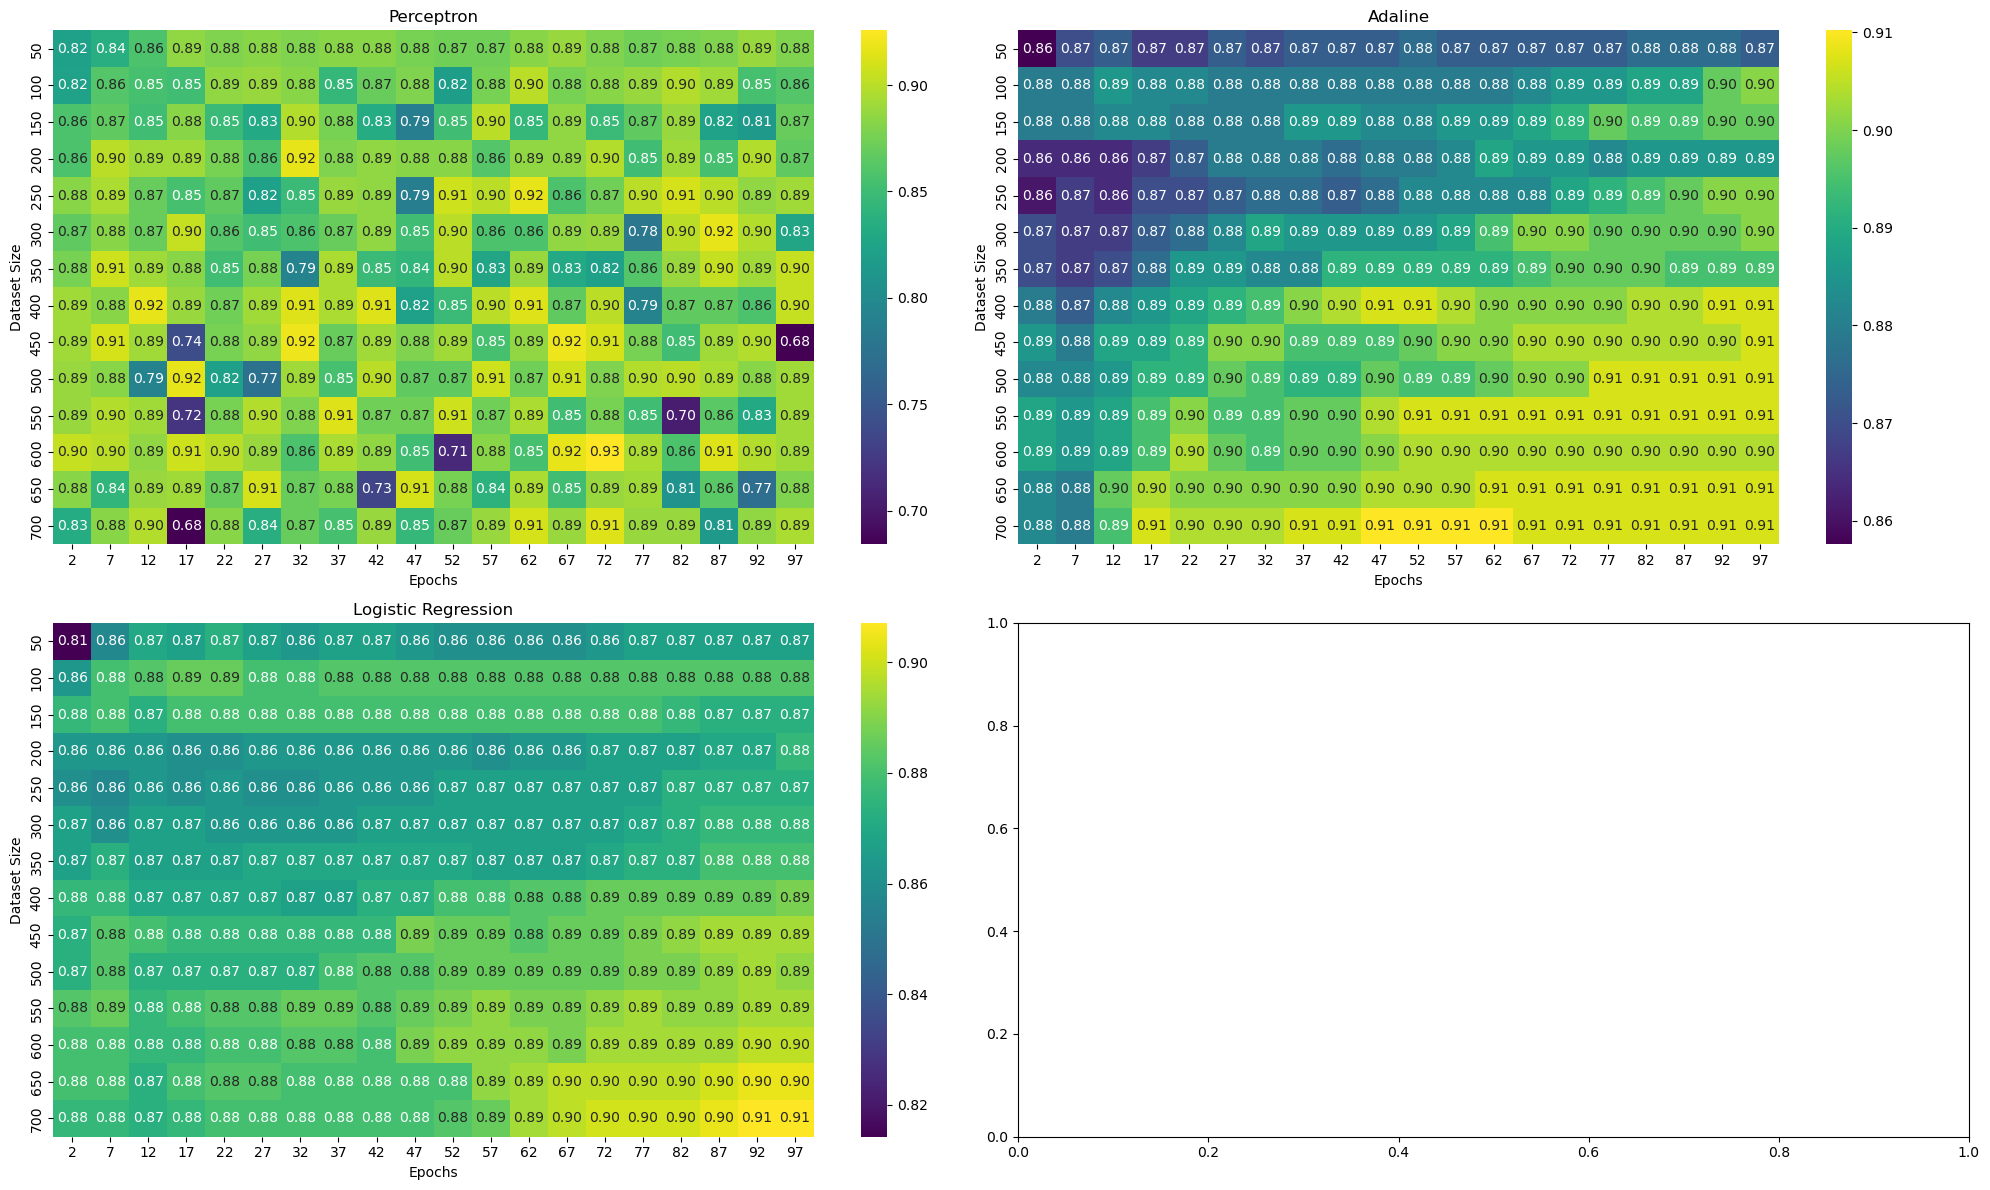

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
axs = axs.flatten()
cmap = "viridis"

for i, (clf_name, df_scores) in enumerate(scores_df.items()):
    sns.heatmap(df_scores, ax=axs[i], annot=True, fmt=".2f", cmap=cmap, cbar=True)
    axs[i].set_title(clf_name)
    axs[i].set_xlabel("Epochs")
    axs[i].set_ylabel("Dataset Size")

plt.tight_layout()
plt.show()

# Part V: Some more plotting

For the following cell to execute you need to have the variable `X_test_scaled` with all samples of the test set and the variable `y_test` with the corresponding labels.
Complete at least up until Part III. Executing the cell will plot something.

1. Add code comments explaining what the lines are doing
2. What is the purpose of the plot?
3. Describe all components of the subplot and then comment in general on the entire plot. What does it show? What does it not show?

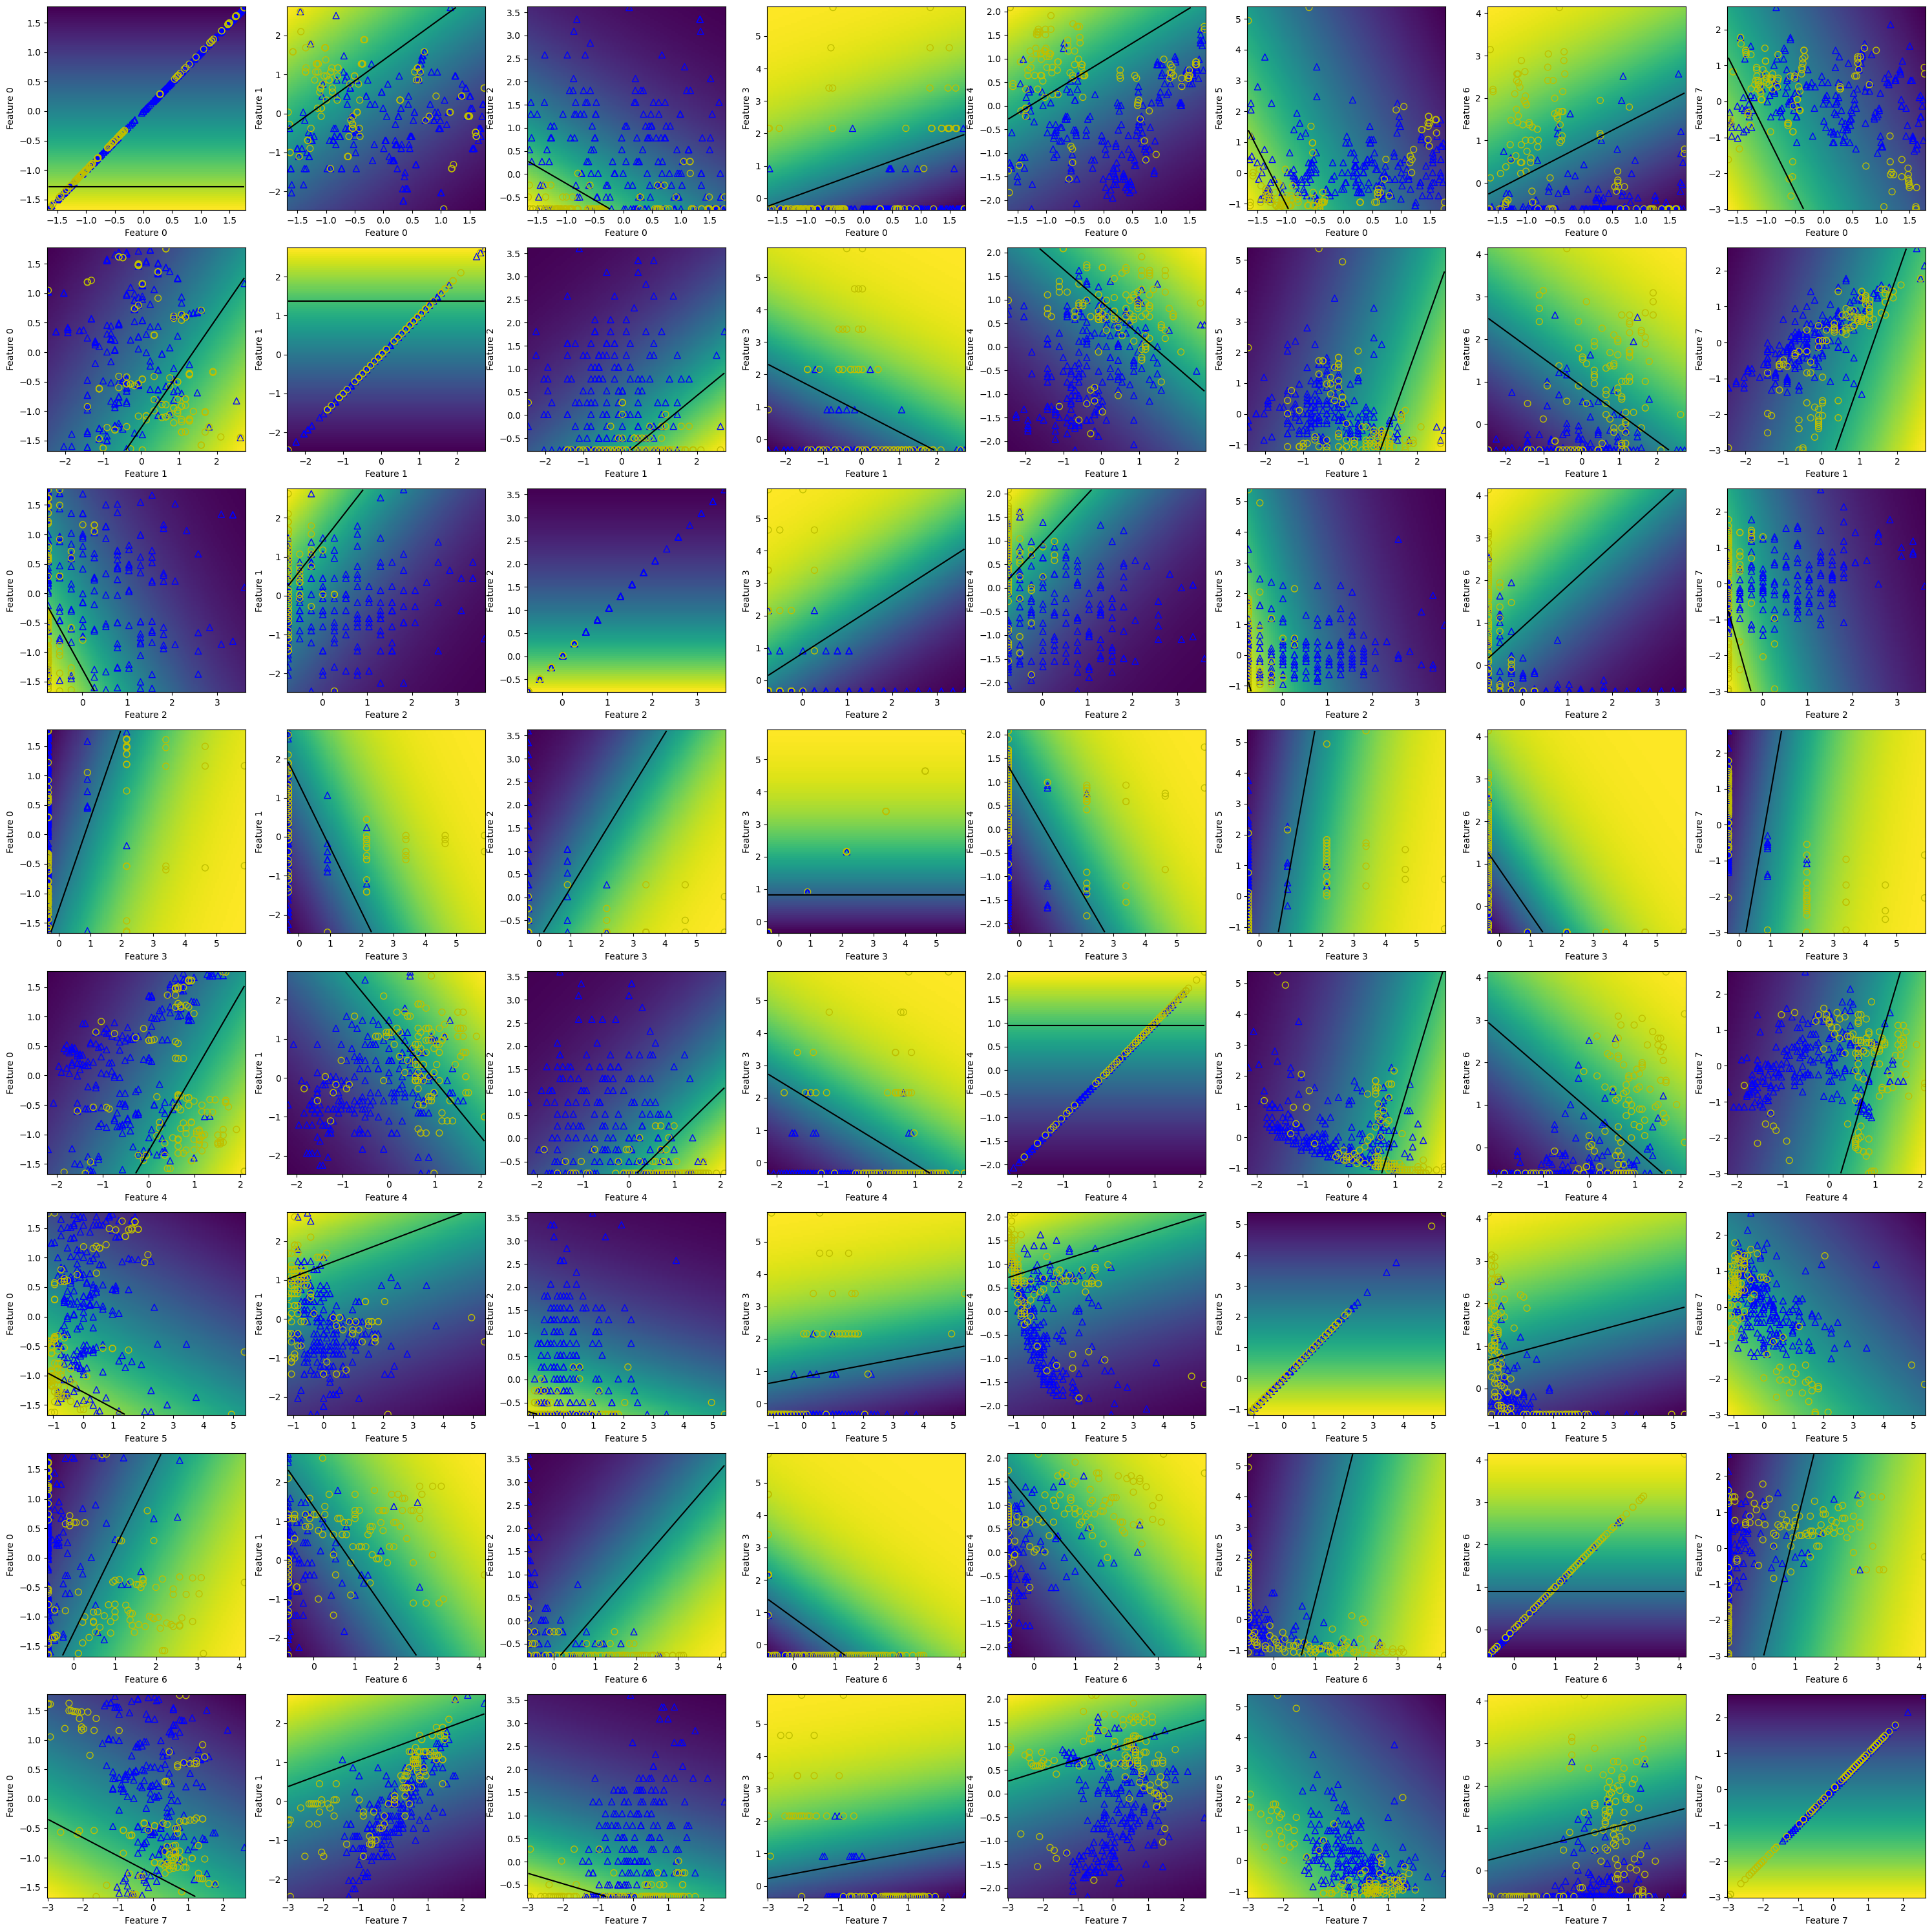

In [ ]:
# Train and a logistic regression model with 300 epochs and learning rate 0.0001
clf = LogisticRegression(eta = 0.0001, epochs = 300, minibatches=1, random_seed=42)

X_test_scaled = test_scaled.copy()

clf.fit(X_test_scaled, y_test)

fig, axes = plt.subplots(8, 8, figsize=(30, 30))
for i in range(0, 8):
    for j in range(0, 8):
        feature_1 = i
        feature_2 = j
        ax = axes[i, j]

        ax.set_xlabel(f"Feature {feature_1}")
        ax.set_ylabel(f"Feature {feature_2}")

        mins = X_test_scaled.min(axis=0)
        maxs = X_test_scaled.max(axis=0)

        x0 = np.linspace(mins[feature_1], maxs[feature_1], 100)
        x1 = np.linspace(mins[feature_2], maxs[feature_2], 100)

        X0, X1 = np.meshgrid(x0, x1)
        X_two_features = np.c_[X0.ravel(), X1.ravel()]
        X_plot = np.zeros(shape=(X_two_features.shape[0], X_test_scaled.shape[1]))

        X_plot[:, feature_1] = X_two_features[:, 0]
        X_plot[:, feature_2] = X_two_features[:, 1]

        y_pred = clf.predict_proba(X_plot)
        Z = y_pred.reshape(X0.shape)

        ax.pcolor(X0, X1, Z)
        ax.contour(X0, X1, Z, levels=[0.5], colors='k')
        ax.scatter(X_test_scaled[y_test == 0, feature_1], X_test_scaled[y_test == 0, feature_2], color="b", marker="^", s=50, facecolors="none")
        ax.scatter(X_test_scaled[y_test == 1, feature_1], X_test_scaled[y_test == 1, feature_2], color="y", marker="o", s=50, facecolors="none")

fig.tight_layout()
plt.show()

## Part VI: Additional discussion

### Part I:
1. What kind of plots did you use to visualize the raw data, and why did you choose these types of plots?

We used scatter plots for two features, but bar plot for the target values. 

### Part II:
1. What happens if we don't shuffle the training data before training the classifiers like in Part IV?

We risk not getting a good representation of the data since the values are not "evenly distributed". Looking at the csv file we can see that a lot of the lines have consecutive same values which may affect the model and make the model generalize well. 

2. How could you do the same train/test split (Point 1.-4.) using scikit-learn?

You can import sklearn and use train_test_split

### Part IV:
1. How does increasing the dataset size affect the performance of the logistic regression model? Provide a summary of your findings.

Looking at the output from pt. 4 and the performance visualization we can see that the performance increases with the data size. Therefore it is fair to assume that the performance will continue to increase with a larger data size. 

2. Describe the relationship between the number of epochs and model accuracy

It is the same story with the number of epochs. Even though the difference is larger with the smallest dataset compared to the largest than the epochs. Therefore it is fair to assume that the performance will continue to increase with more epochs.

3. Which classifier is much slower to train and why do you think that is?

The perceptron is a lot slower than the other models, we think this is because it updates its weights immidiately for every misclassified sample.

4. One classifier shows strong fluctuations in accuracy for different dataset sizes and number of epochs. Which one is it and why do you think this happens?

The Perceptron shows strong fluctuations, we think this is because it doesnt account for the magnitude of the error. This leads to large and abrupt changes in its weights which affect the performance.